In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\ajayc\Downloads\networkadds.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


C:\Users\ajayc\AppData\Local\Temp\ipykernel_56156\3411185822.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\ajayc\AppData\Local\Temp\ipykernel_56156\3411185822.py:6: RuntimeWarning: divide by zero encountered in log
  cost = - (1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
C:\Users\ajayc\AppData\Local\Temp\ipykernel_56156\3411185822.py:6: RuntimeWarning: invalid value encountered in multiply
  cost = - (1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Optimized theta: [  -0.85        -0.773375  -185.5625       1.9930625]


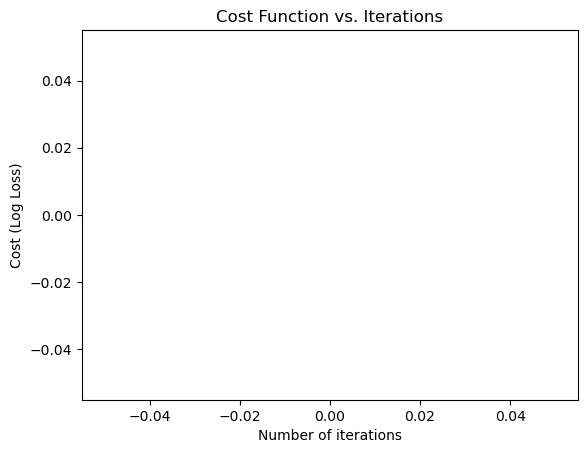

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def compute_cost(X, y, theta):
    m = len(y)  # number of training examples
    predictions = sigmoid(X.dot(theta))  # hypothesis
    cost = - (1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(X.dot(theta))
        theta -= (learning_rate / m) * X.T.dot(predictions - y)
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history
X = data.drop(columns=['Gender_Female','Gender_Male'])  # Assuming 'Target' is the target variable column
y = data['Purchased'] 
X = np.c_[np.ones(X.shape[0]), X] 
y = y.values
theta = np.zeros(X.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Train the logistic regression model using gradient descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Print the final model parameters
print(f"Optimized theta: {theta}")
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (Log Loss)')
plt.title('Cost Function vs. Iterations')
plt.show()


In [11]:
import matplotlib as plt
import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\Users\ajayc\Downloads\Salary_dataset.xls")
df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [13]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
m,n=x.shape
print('x[0]={} y[0]={}'.format(x[0],y[0]))

x[0]=[0.  1.2] y[0]=39344.0


In [15]:
def sigmoid(z):
    return np.dot(x,theta)
def lr_hypothesis(x,theta):
    return np.dot(x,theta)

z=np.ones(m)
z=z.reshape(m,1)
x=np.append(z,x,axis=1)

print('x[0]={} y[0]={}'.format(x[0],y[0]))
x.shape

x[0]=[1.  0.  1.2] y[0]=39344.0


(30, 3)

In [21]:
m,n=x.shape
theta=np.zeros(n)
theta=theta.reshape(n,1)
y=y.reshape(-1,1)

def compute_cost(theta,x,y):
    epsilon = 1e-10
    predictions = sigmoid(lr_hypothesis(x, theta))
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    infunc = -y + np.log(predictions) - (1 - y) * np.log(1 - predictions) 
    j=np.sum(infunc)/m
    return j
L=compute_cost(theta,x,y)
print(L)

-76027.02585853025


In [26]:
iterations=500000
alpha=0.01
def gradientDescent(x,y,theta,alpha,iterations):
    for _ in range(iterations):
        infunc1=sigmoid(lr_hypothesis(x,theta))-y
        gradient=np.dot(x.transpose(),infunc1)/m
        theta=theta-(alpha/m)*gradient
    return theta
theta=gradientDescent(x,y,theta,alpha,iterations)
print(theta)

[[-6.09185950e+11]
 [-1.19139549e+13]
 [-4.28022118e+12]]


In [28]:
L=compute_cost(theta,x,y)

print(L)

-76027.02585853025


In [ ]:
import pandas as pd
import math

df = pd.read_csv(r"C:\Users\ajayc\Downloads\loan (1).csv")
df["y_binary"] = (df["loan_status"] == "Approved").astype(int)
X = df[["age", "income", "credit_score"]].values
y = df['y_binary'].values

def sigmoid(z):
    if z >= 0:
        return 1 / (1 + math.exp(-z))
    else:
        exp_z = math.exp(z)
        return exp_z / (1 + exp_z)
    

def calculate_cost(X, y, weights):
    m = len(y)
    total_cost = 0
    for i in range(m):
        prediction = sigmoid(sum(X[i][j] * weights[j] for j in range(len(weights))))
        total_cost += - (y[i] * math.log(prediction) + (1 - y[i]) * math.log(1 - prediction))
    return total_cost / m

def gd(X, y, m, alpha, iter):
    weights = [0.0] * len(X[0])
    for _ in range(iter):
        predictions = []
        for i in range(len(y)):
            pred = sigmoid(sum(X[i][j] * weights[j] for j in range(len(weights))))
            predictions.append(pred)
        for j in range(len(weights)):
            gradient = sum((predictions[i] - y[i]) * X[i][j] for i in range(len(y))) / len(y)
            weights[j] -= alpha * gradient
    return weights

m = 0
alpha = 0.01
iter = 1000
final_weights = gd(X, y, m, alpha, iter)
print("Final Coefficient is:", final_weights)